Problema de negocio: Predecir si un cliente mantendrá un servicio o si lo cancelará. Se trata de un problema de clasificación. En nuestro caso lo haremos ``no supervisado``

In [248]:
import bootcampviztools as bt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from toolbox_ML import describe_df
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


Fuente de los datos

In [189]:
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [191]:
describe_df(df)

,columna,tipo,%_nulos,valores_unicos,%_cardinalidad
0,customerID,object,0.0,7043,100.00
1,gender,object,0.0,2,0.03
2,SeniorCitizen,int64,0.0,2,0.03
3,Partner,object,0.0,2,0.03
4,Dependents,object,0.0,2,0.03
5,tenure,int64,0.0,73,1.04
6,PhoneService,object,0.0,2,0.03
7,MultipleLines,object,0.0,3,0.04
8,InternetService,object,0.0,3,0.04
9,OnlineSecurity,object,0.0,3,0.04


Tabla de las variables.

| Variable          | Tipo     | Descripción | Notas |
|------------------|---------|-------------|-------|
| customerID       | object  | Identificador único del cliente | Puede eliminarse si no aporta valor al análisis |
| gender          | object  | Género del cliente (`Male`, `Female`) |  |
| SeniorCitizen   | int64   | Indica si el cliente es un ciudadano senior (`0` = No, `1` = Sí) | Puede convertirse a categoría booleana |
| Partner         | object  | Indica si el cliente tiene pareja (`Yes`, `No`) |  |
| Dependents      | object  | Indica si el cliente tiene dependientes (`Yes`, `No`) |  |
| tenure          | int64   | Número de meses que el cliente ha estado con la compañía |  |
| PhoneService    | object  | Indica si el cliente tiene servicio de teléfono (`Yes`, `No`) |  |
| MultipleLines   | object  | Indica si el cliente tiene múltiples líneas telefónicas (`Yes`, `No`, `No phone service`) |  |
| InternetService | object  | Tipo de servicio de internet contratado (`DSL`, `Fiber optic`, `No`) |  |
| OnlineSecurity  | object  | Indica si el cliente tiene seguridad en línea (`Yes`, `No`, `No internet service`) |  |
| OnlineBackup    | object  | Indica si el cliente tiene respaldo en línea (`Yes`, `No`, `No internet service`) |  |
| DeviceProtection| object  | Indica si el cliente tiene protección de dispositivos (`Yes`, `No`, `No internet service`) |  |
| TechSupport     | object  | Indica si el cliente tiene soporte técnico (`Yes`, `No`, `No internet service`) |  |
| StreamingTV     | object  | Indica si el cliente tiene servicio de TV en streaming (`Yes`, `No`, `No internet service`) |  |
| StreamingMovies | object  | Indica si el cliente tiene servicio de películas en streaming (`Yes`, `No`, `No internet service`) |  |
| Contract        | object  | Tipo de contrato (`Month-to-month`, `One year`, `Two year`) | Puede ser relevante para predecir la cancelación del servicio |
| PaperlessBilling| object  | Indica si el cliente usa facturación electrónica (`Yes`, `No`) |  |
| PaymentMethod   | object  | Método de pago utilizado (`Electronic check`, `Mailed check`, `Bank transfer (automatic)`, `Credit card (automatic)`) |  |
| MonthlyCharges  | float64 | Cargo mensual del cliente |  |
| TotalCharges    | object  | Cargo total del cliente | Debería ser numérica, pero aparece como objeto (posibles valores faltantes) |
| Churn          | object  | Indica si el cliente ha cancelado el servicio (`Yes`, `No`) | Variable objetivo si el problema es de clasificación |


A primera vista podemos ver el tipo de datos que tenemos y el número de instancias. Nuestro dataset cuenta con un total de **7043 instancias** y un total de **20 columnas**. Podemos encontrar tanto columnas tipo `object` como tipo numéricas, ya sean `float` o `int`.

La columna `customerID` puede usarse como índice o puede ser eliminada ya que no aporta valor.

La columna `TotalCharges` tiene valores numéricos pero está clasificada como object.


In [192]:
#Convertir la columna 'TotalCharges' en numérica.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [193]:
# Eliminar columna 'customerID'
df.drop(columns = 'customerID', inplace = True, axis = 1)

In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


Valores nulos del dataset.

In [195]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

La columna `TotalCharges` tiene un total de 11 valores nulos.

In [196]:
media = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(media)

Una vez realizado la limpieza de datos, pasamos con un análisis EDA. Aunque se trate un problema de clasificación no supervisado usaremos la columna Churn como guía para realizar el análisis de las variables.

In [197]:
cat_features = df.select_dtypes(include=['object','category']).columns.to_list()
num_features = df.select_dtypes(include=['float','int']).columns.to_list()

cat_features.remove('Churn')
num_features.remove('SeniorCitizen')
cat_features.append('SeniorCitizen')

División del dataset en train_set y test_set

In [198]:
target = 'Churn'

In [199]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

Análisis variables categóricas

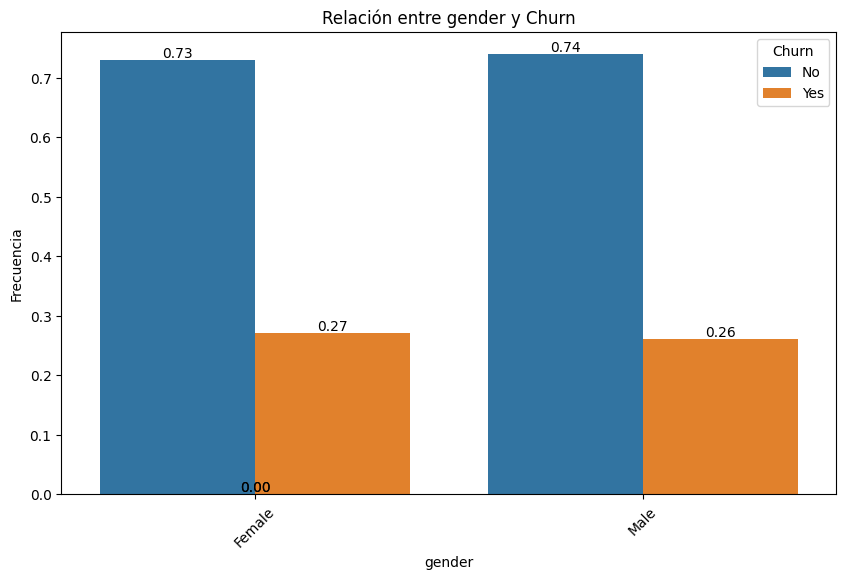

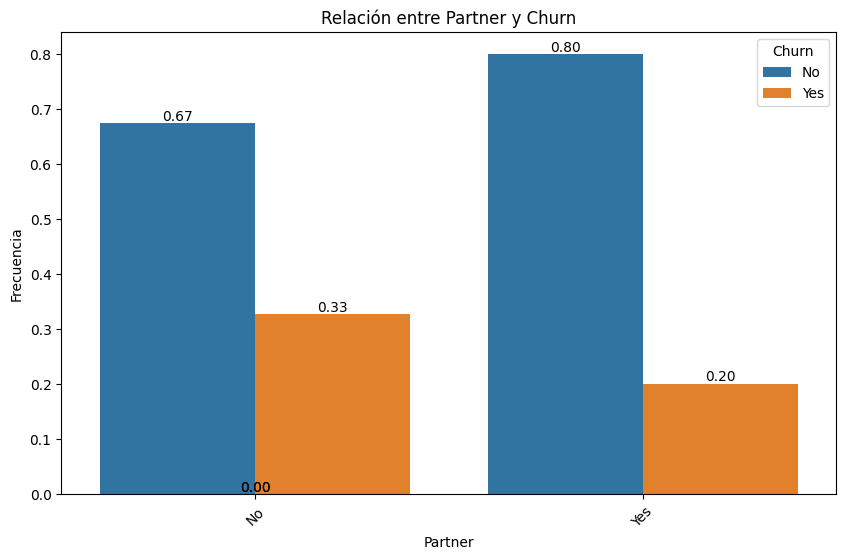

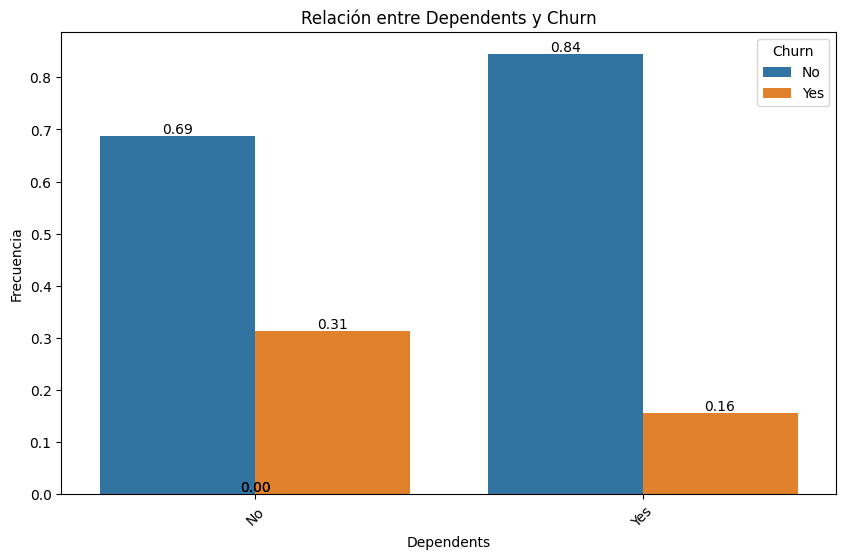

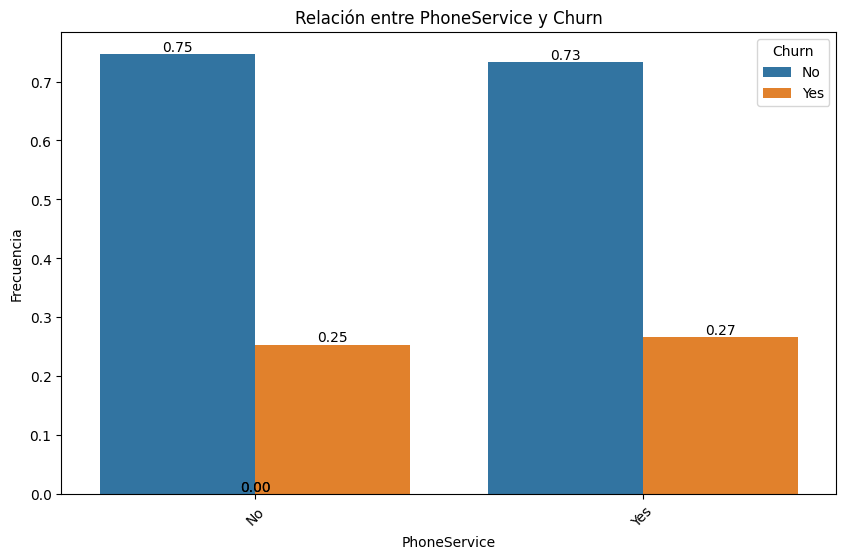

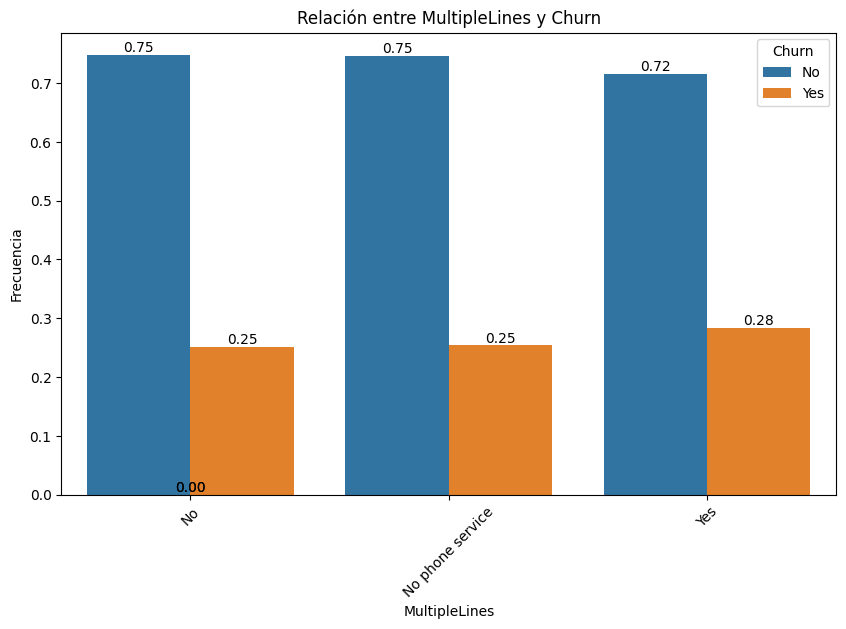

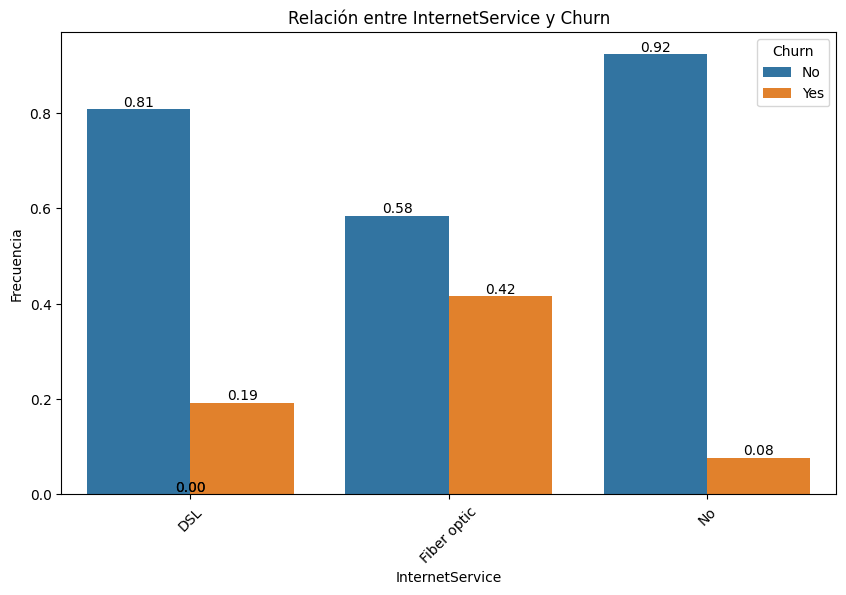

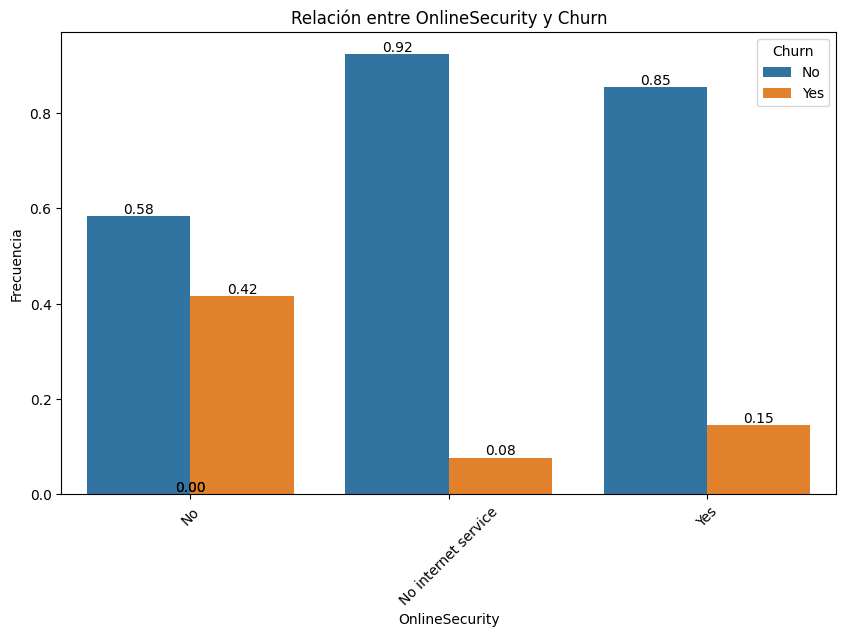

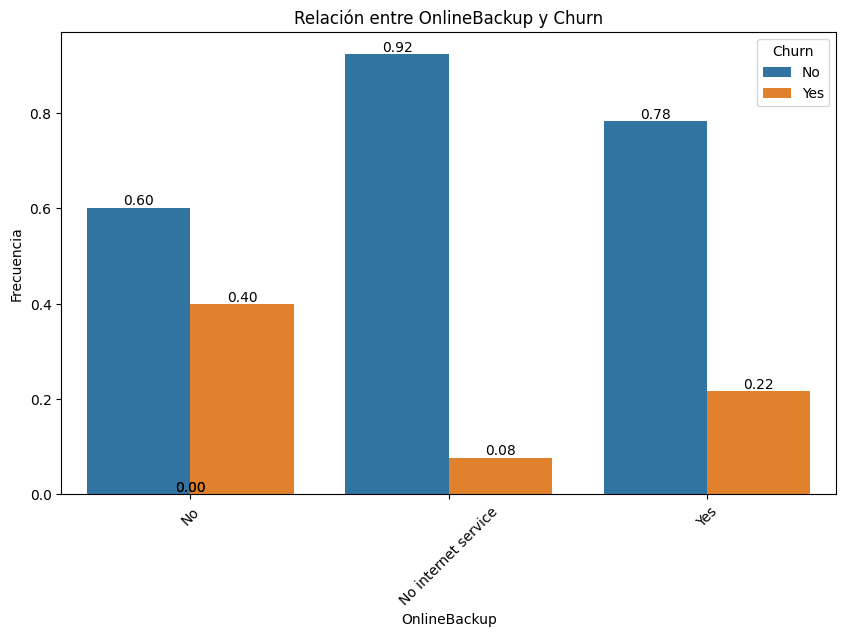

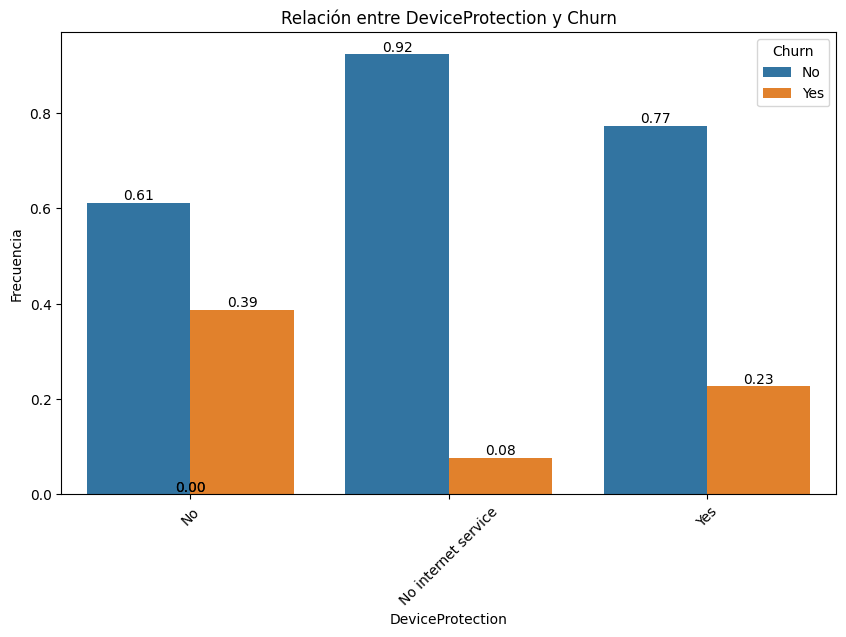

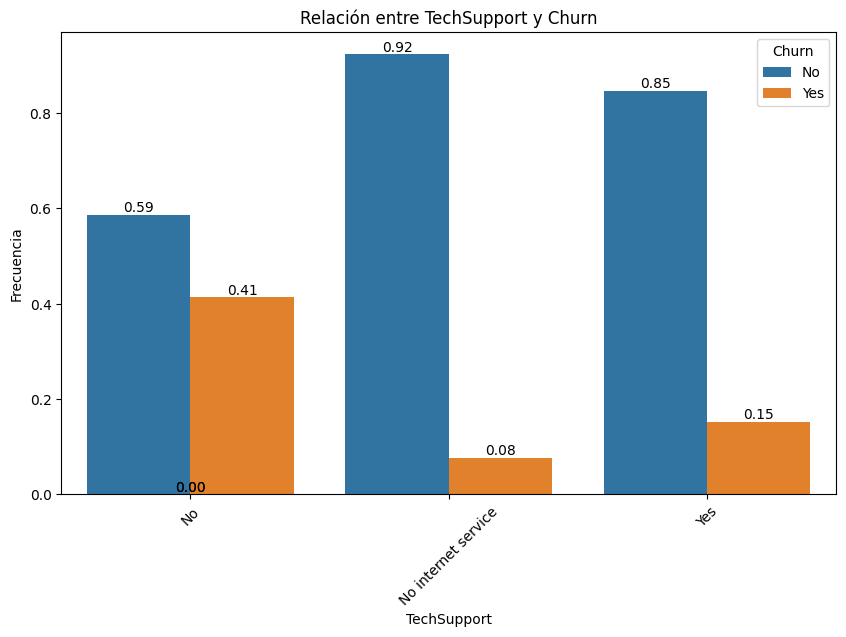

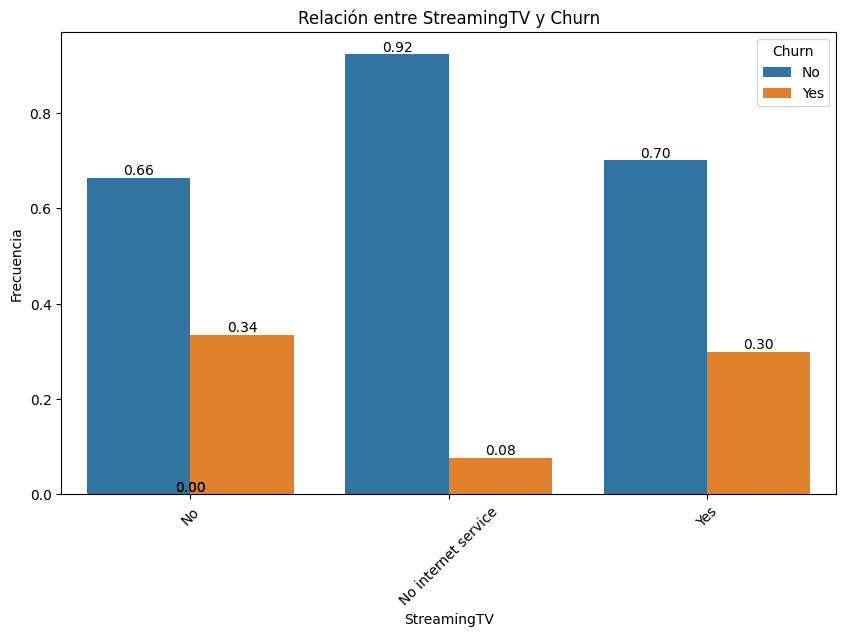

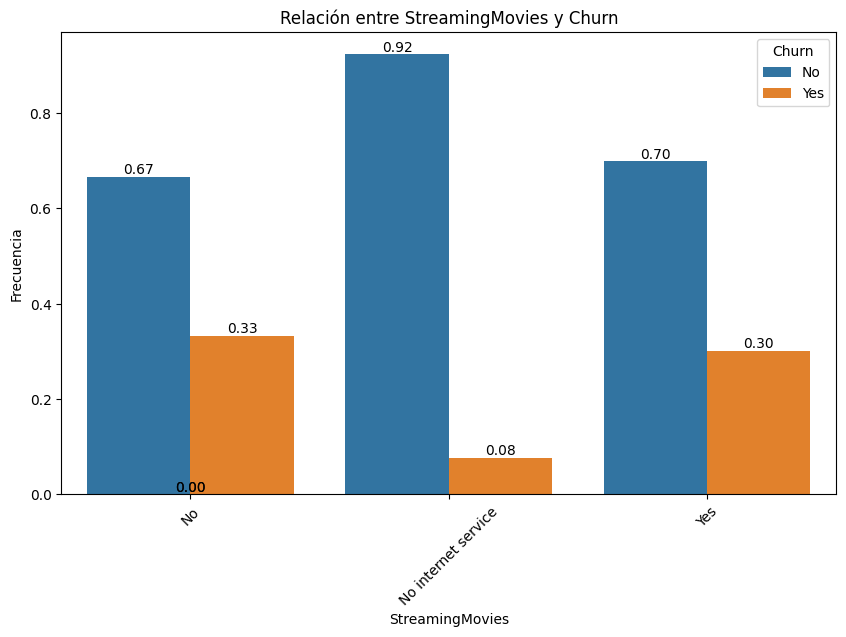

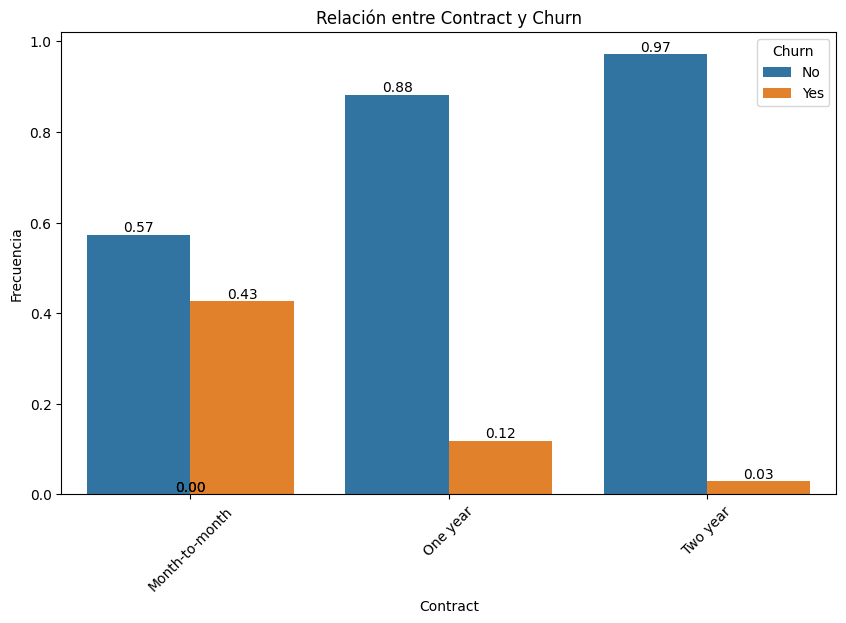

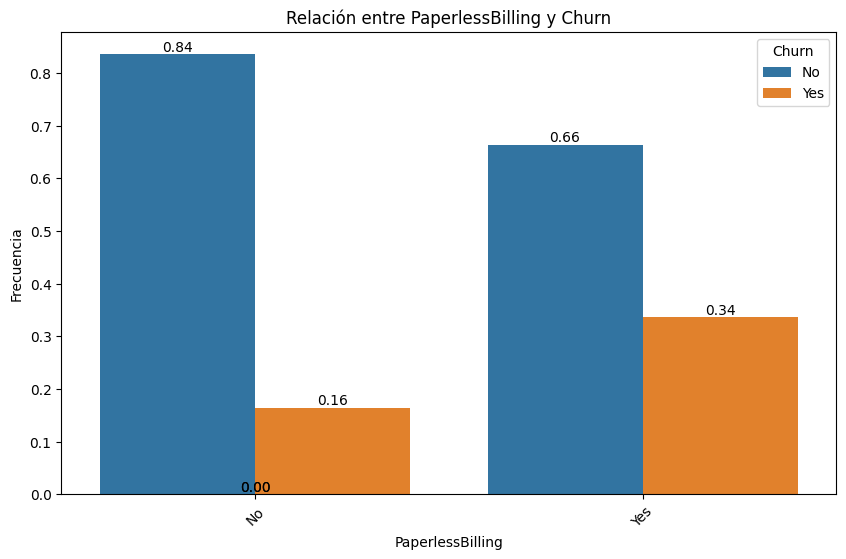

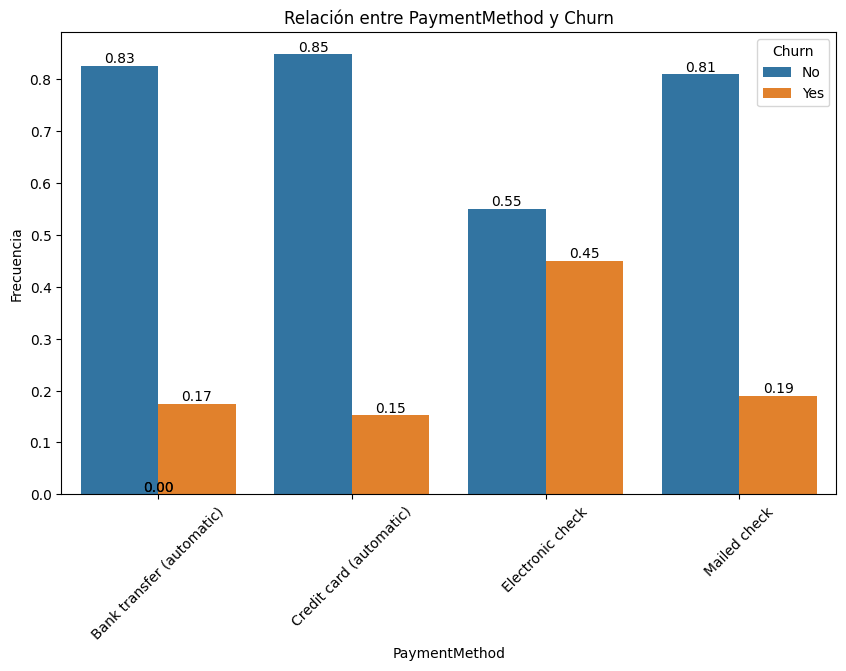

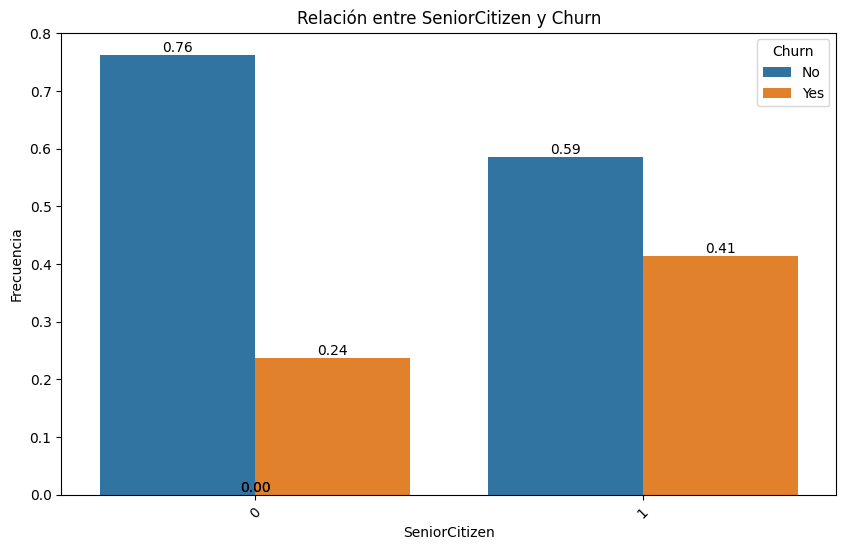

In [200]:
for col in cat_features:
    bt.plot_categorical_relationship_fin(df = train_set, cat_col1 = col, cat_col2=target, relative_freq=True, show_values=True)

In [201]:
cat_features_selected = ['Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup',
                         'DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','SeniorCitizen']


Análisis variables numéricas.

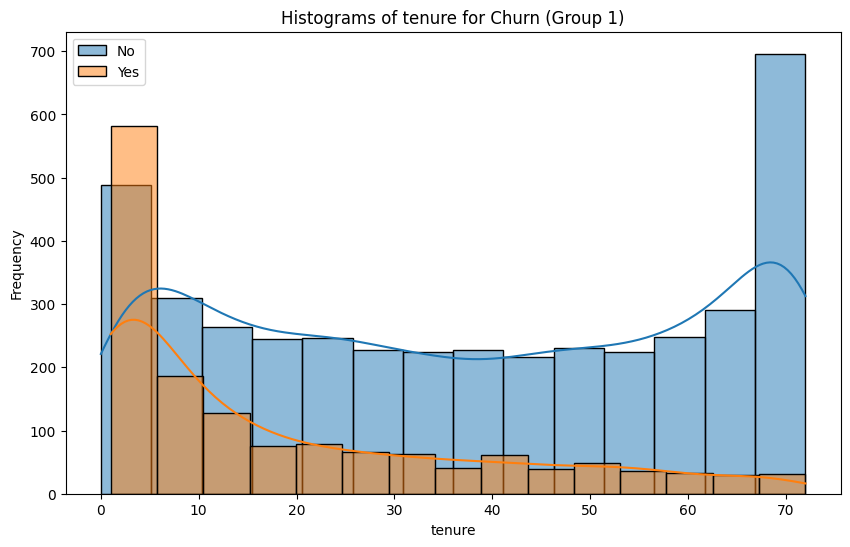

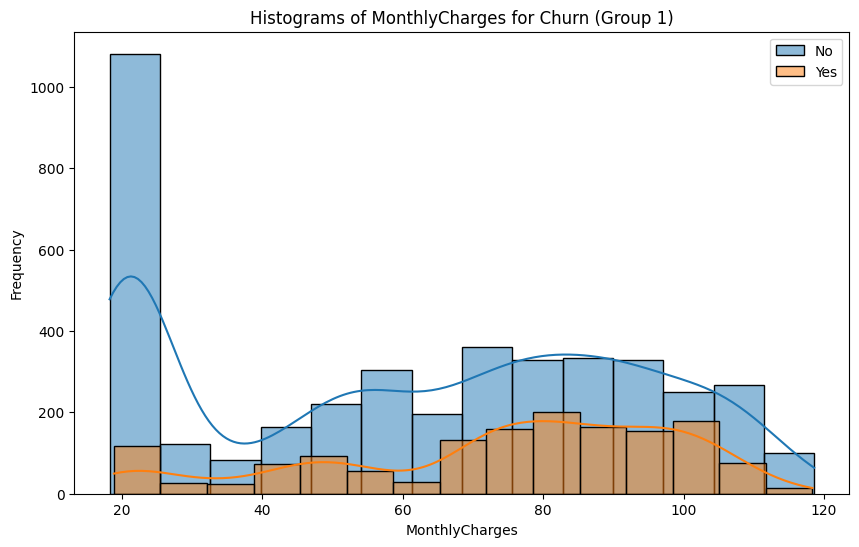

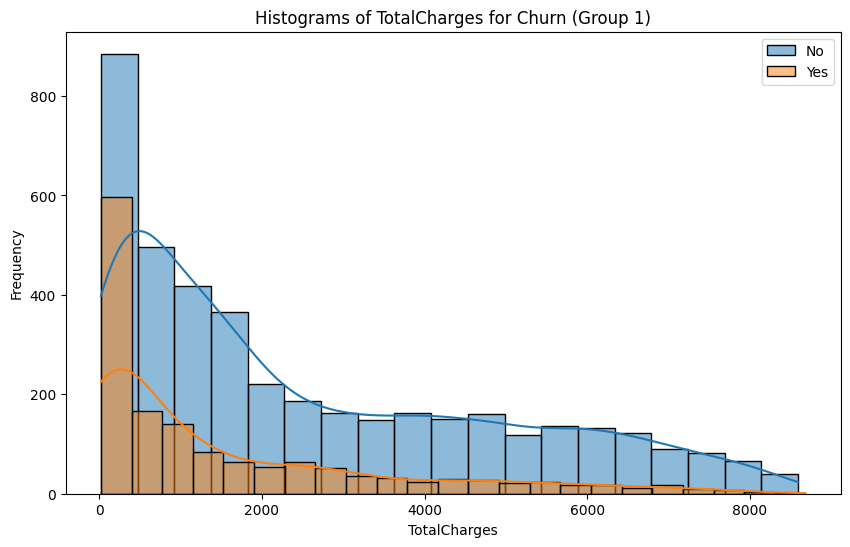

In [202]:
for col in num_features:
    bt.plot_grouped_histograms(df = train_set, cat_col = target, num_col=col, group_size=2)

In [203]:
# valores_target = train_set[target].unique().tolist()

# for col in num_features:
#     plt.figure(figsize=(8,6))
#     for i in sorted(valores_target):
#         sns.kdeplot(train_set[train_set[target] == i][col],
#                     fill = True,
#                     alpha = 0.5,
#                     label = f'Clase {i}')
#     plt.title(f'Distribuciones de {col}')
#     plt.xlabel(col)
#     plt.ylabel('Densidad')
#     plt.legend(title = 'Clases')
#     plt.show()

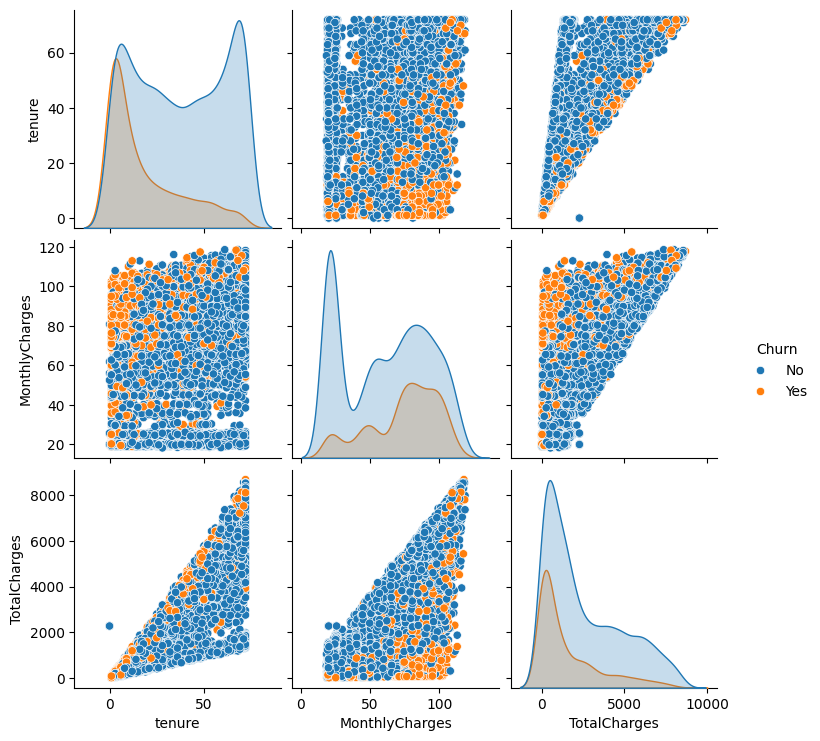

In [204]:
sns.pairplot(train_set[num_features + [target]], hue = target);

Codificación de las variables. Para codificar las variables usaremos un `Onehotencoder`

In [205]:
cat_features.append('Churn')

In [206]:
def one_hot_encode_datasets(train_set, test_set, cat_features):
    """
    Codifica las variables categóricas de train_set y test_set usando OneHotEncoder.
    
    Parámetros:
    - train_set: DataFrame de entrenamiento.
    - test_set: DataFrame de prueba.
    - cat_features: Lista de columnas categóricas a codificar.

    Retorna:
    - train_set codificado
    - test_set codificado
    """
    encoder = OneHotEncoder(handle_unknown='ignore')  # Ignorar categorías nuevas en test

    # Codificar el train_set
    encoded_train_array = encoder.fit_transform(train_set[cat_features]).toarray()
    encoded_train_df = pd.DataFrame(encoded_train_array, columns=encoder.get_feature_names_out(cat_features))

    # Codificar el test_set
    encoded_test_array = encoder.transform(test_set[cat_features]).toarray()
    encoded_test_df = pd.DataFrame(encoded_test_array, columns=encoder.get_feature_names_out(cat_features))

    # Reseteo de índices para evitar problemas al concatenar
    train_set = train_set.drop(columns=cat_features).reset_index(drop=True)
    test_set = test_set.drop(columns=cat_features).reset_index(drop=True)

    # Concatenar los conjuntos codificados con los originales sin variables categóricas
    train_set = pd.concat([train_set, encoded_train_df], axis=1)
    test_set = pd.concat([test_set, encoded_test_df], axis=1)

    return train_set, test_set, encoder

In [207]:
one_hot_encode_datasets(train_set, test_set, cat_features)
train_set, test_set, encoder = one_hot_encode_datasets(train_set, test_set, cat_features)


In [ ]:
train_set.drop(columns = 'Churn_No', axis = 1, inplace = True)
test_set.drop(columns = 'Churn_No', axis = 1, inplace = True)

In [214]:
train_set

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1,Churn_Yes
0,21,64.85,1336.800000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,54,97.20,5129.450000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,23.45,23.450000,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,4,70.20,237.950000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0,61.90,2283.300441,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1,95.00,95.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5630,23,91.10,2198.300000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5631,12,21.15,306.050000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5632,12,99.45,1200.150000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [215]:
num_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [218]:
minmaxscaler = MinMaxScaler()

train_set[num_features] = minmaxscaler.fit_transform(train_set[num_features])
test_set[num_features] = minmaxscaler.transform(test_set[num_features])

In [222]:
target = 'Churn_Yes'

In [223]:
x_train = train_set.drop(columns = target, axis = 1)
y_train = train_set[target]

x_test = test_set.drop(columns = target, axis = 1)
y_test = test_set[target]

### Over sampling

In [249]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [250]:
rf_clf = RandomForestClassifier(random_state = 42, class_weight= 'balanced')
rf_clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [251]:
param_grid = {
    'n_estimators': [10, 50, 100],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Mínimo de muestras en una hoja
}

rf_clf_grid = GridSearchCV(param_grid= param_grid,
                           estimator= rf_clf,
                           cv = 5,
                           scoring = 'balanced_accuracy')


rf_clf_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='balanced_accuracy')

In [252]:
best_estimator = rf_clf_grid.best_estimator_

In [263]:
cv = cross_val_score(best_estimator, X = x_test, y = y_test, cv = 5)

In [264]:
cv_mean = np.mean(cv)

In [265]:
cv_mean

0.7856742636480654

<Axes: >

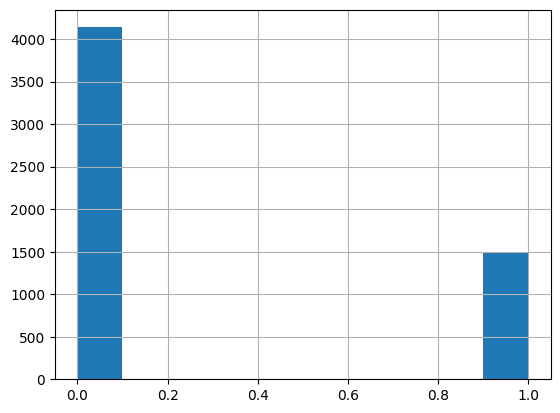

In [261]:
train_set.Churn_Yes.hist()

In [266]:
y_pred = best_estimator.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.96      0.86      1036
         1.0       0.67      0.21      0.32       373

    accuracy                           0.76      1409
   macro avg       0.72      0.59      0.59      1409
weighted avg       0.74      0.76      0.71      1409



In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [210]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline(steps=[
    ('summary', FunctionTransformer(lambda df: pd.DataFrame({
        'Nombre_columna': df.columns,
        'Tipo': df.dtypes,
        'Valores_unicos': df.nunique(),
        'Valores_missing': df.isnull().sum(),
        'Valores_missing(%)': (df.isnull().sum() / len(df)) * 100,
        'Cardinalidad(%)': round((df.apply(lambda x: len(x.unique())) / len(df)) * 100, 2)

    }).reset_index(drop = True), validate=False))
])

In [211]:
pipeline

Pipeline(steps=[('summary',
                 FunctionTransformer(func=<function <lambda> at 0x0000011070B47880>))])

In [212]:
df_report = pipeline.fit_transform(df)
df_report

,Nombre_columna,Tipo,Valores_unicos,Valores_missing,Valores_missing(%),Cardinalidad(%)
0,gender,object,2,0,0.0,0.03
1,SeniorCitizen,int64,2,0,0.0,0.03
2,Partner,object,2,0,0.0,0.03
3,Dependents,object,2,0,0.0,0.03
4,tenure,int64,73,0,0.0,1.04
5,PhoneService,object,2,0,0.0,0.03
6,MultipleLines,object,3,0,0.0,0.04
7,InternetService,object,3,0,0.0,0.04
8,OnlineSecurity,object,3,0,0.0,0.04
9,OnlineBackup,object,3,0,0.0,0.04


KeyError: 'T'

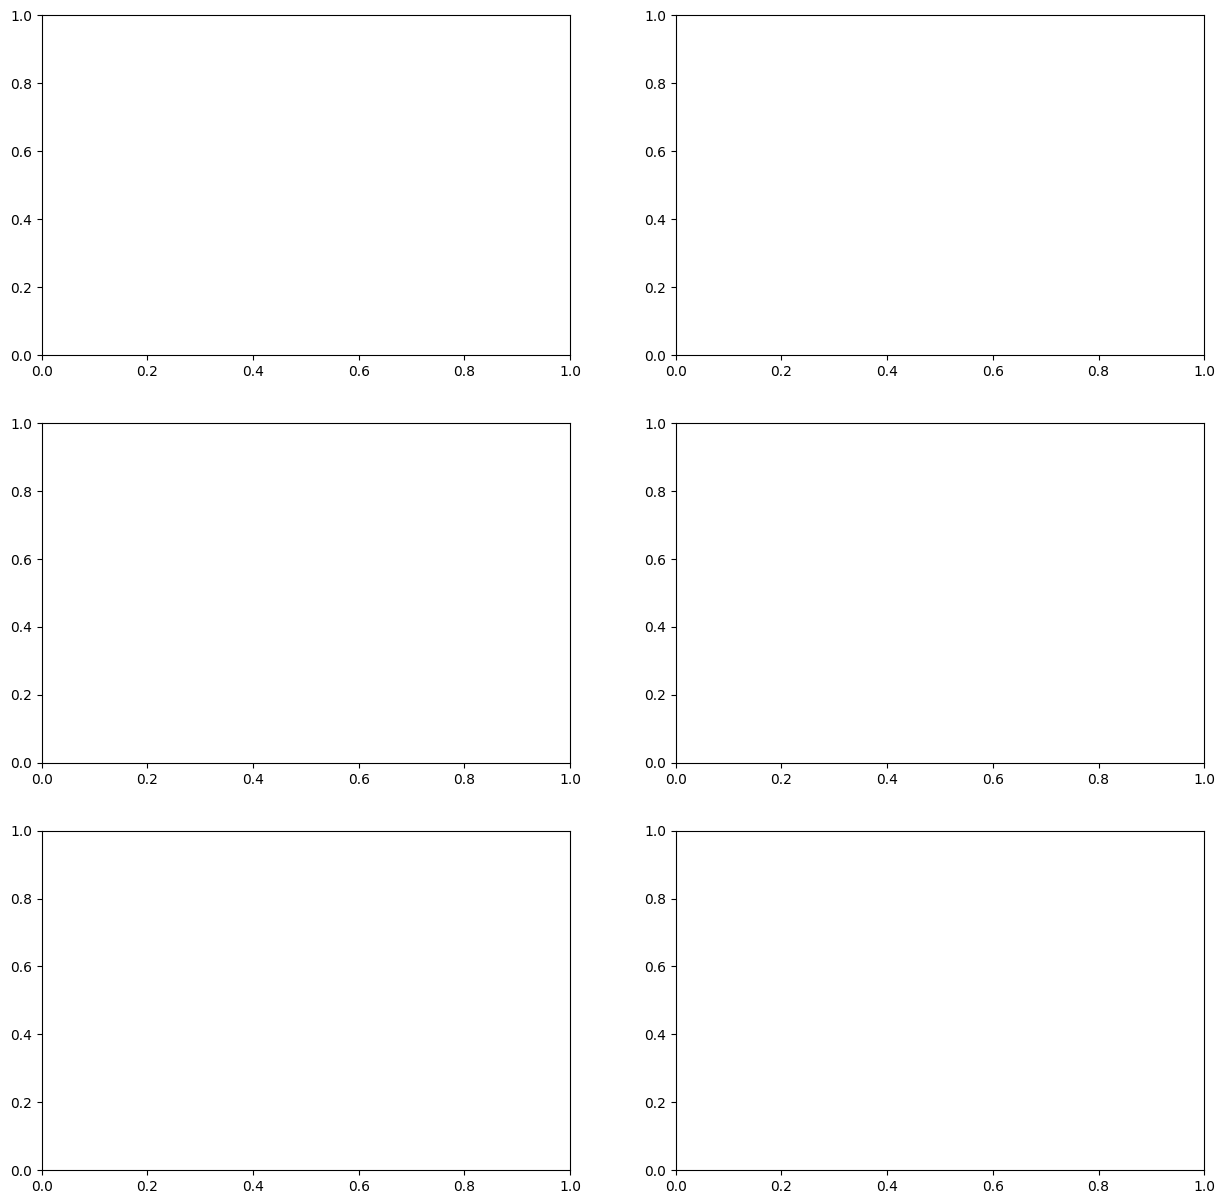

In [213]:
pipeline = Pipeline(steps=[
    ('categorical_analysis', FunctionTransformer(lambda df: bt.pinta_distribucion_categoricas(df[cat_features], 'Target'), 
                                                 validate=False))
])

# Aplicar el pipeline al DataFrame
pipeline.fit_transform(df)